In [1]:
import pyDOE2 as doe
import seaborn as sns
sns.set(style="ticks", color_codes=True)

import pandas as pd
import numpy as np

In [2]:
compo = doe.lhs(6,60000)

df_doe = pd.DataFrame(data=compo,columns=['Pu8', 'Pu9', 'Pu0', 'Pu1', 'Pu2', 'Am1'])

df_doe.Pu8 = 0    + 0.10  * df_doe.Pu8
df_doe.Pu9 = 0.40 + 0.50  * df_doe.Pu9
df_doe.Pu0 = 0    + 0.30  * df_doe.Pu0
#df_doe.Pu1 = 0    + 0.20  * df_doe.Pu1
df_doe.Pu2 = 0    + 0.20  * df_doe.Pu2
df_doe.Am1 = 0    + 0.07  * df_doe.Am1

df_doe.Pu1 = 1 - (df_doe.Pu8+df_doe.Pu9+df_doe.Pu0+df_doe.Pu2+df_doe.Am1)

df_doe = df_doe.drop(df_doe[df_doe.Pu1 < 0].index)
df_doe = df_doe.drop(df_doe[df_doe.Pu1 > 0.20].index)

df_doe = df_doe.round(3)

df_doe = df_doe.drop(df_doe[(df_doe.Pu8+df_doe.Pu9+df_doe.Pu0+df_doe.Pu1+df_doe.Pu2+df_doe.Am1) != 1].index)

print("Number of compos : ",len(df_doe.index))

df_doe.to_csv('DOE/doe.txt',sep=' ', index=False, header=False)


Number of compos :  10748


In [7]:
0.792+0.04+0.069+0.033+0.042

0.9760000000000001

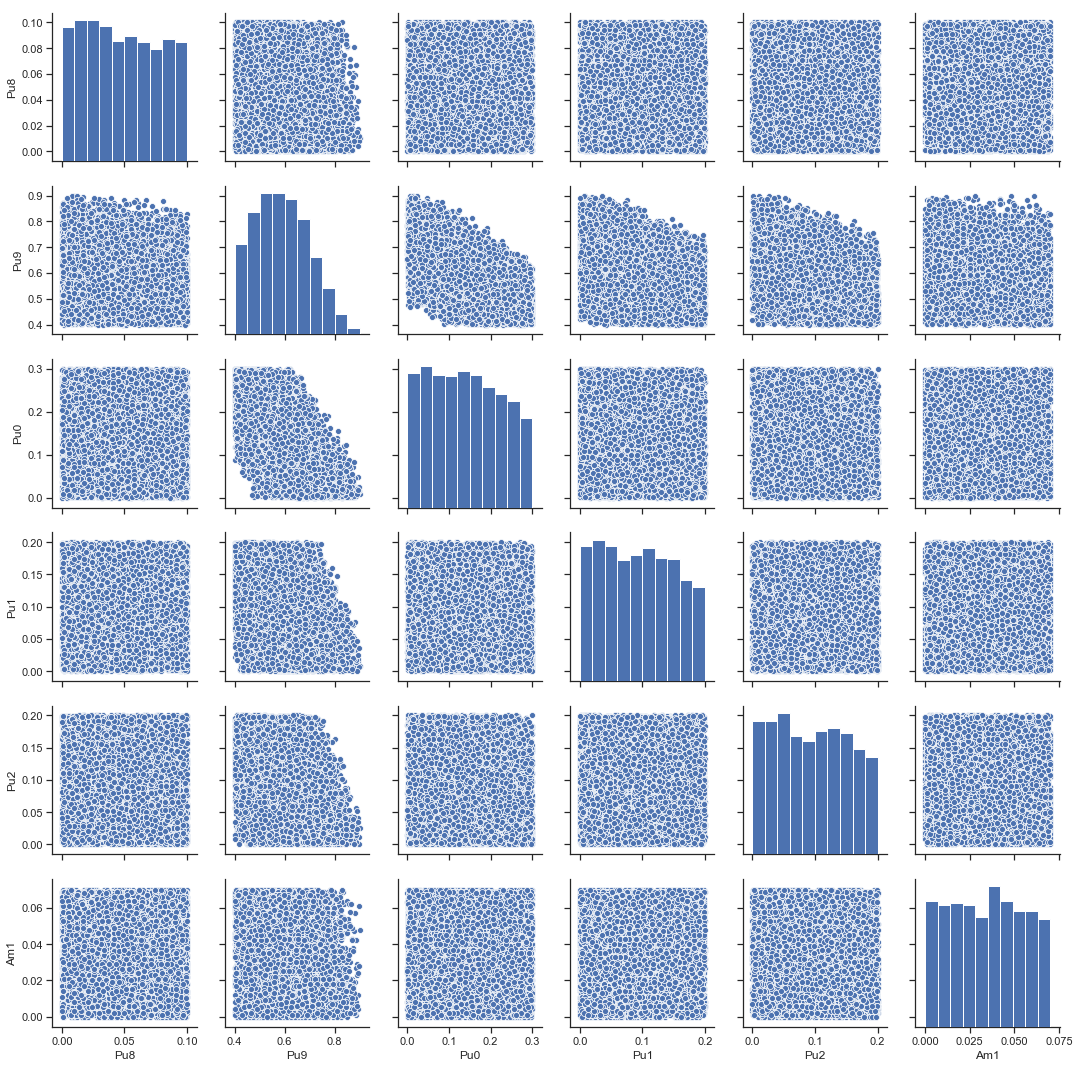

In [6]:
sns.set(style="ticks")

sns_plot = sns.pairplot(df_doe)
sns_plot.savefig("/Users/thiollie/output.png")